<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Осень 2020</b></h3>

<h2 style="text-align: right;"><b>Выполнил: Dmitry Shereshevskiy</b></h2>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/t/f50bc21dbe0e42dabe5e32a21f2e5235) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика. 

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование.

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [3]:
data = pd.read_csv('./train.csv')

In [4]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [5]:
# YOUR CODE

In [6]:
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [7]:
data.shape

(5282, 20)

In [8]:
data.sample(5)  # Посмотрите на случайные строчки

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
2044,60,109.45,6572.85,Male,0,Yes,No,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),0
1543,56,52.00,2884.9,Male,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,0
4061,69,39.10,2779.5,Male,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,Two year,No,Mailed check,0
2221,1,69.95,69.95,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Electronic check,1
4013,71,108.55,7616,Male,0,Yes,No,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

#### числовые и категориальные колонки можно фильтровать автоматически:

In [10]:
cat_idx = (data.drop(target_col, axis=1).dtypes == 'object')
cat_cols_ = data.drop(target_col, axis=1).columns[cat_idx]
cat_cols_

Index(['TotalSpent', 'Sex', 'HasPartner', 'HasChild', 'HasPhoneService',
       'HasMultiplePhoneNumbers', 'HasInternetService',
       'HasOnlineSecurityService', 'HasOnlineBackup', 'HasDeviceProtection',
       'HasTechSupportAccess', 'HasOnlineTV', 'HasMovieSubscription',
       'HasContractPhone', 'IsBillingPaperless', 'PaymentMethod'],
      dtype='object')

In [11]:
num_idx = (data.drop(target_col, axis=1).dtypes != 'object')
num_cols_ = data.drop(target_col, axis=1).columns[num_idx]
num_cols_  

Index(['ClientPeriod', 'MonthlySpending', 'IsSeniorCitizen'], dtype='object')

#### НО ОБРАТИМ ВНИМАНИЕ:
- это способ фильтрации колонок нужно перепроверять. Как видим, на нашем примере он кое-где не сработал (см., например, **IsSeniorCitizen** или **TotalSpent**)

#### количество **nan** в каждой колонке

In [12]:
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

#### Вывод:
- пока незаполненных данных не видно, необходимость заполнять пропуски отсутствует

Исследуем **TotalSpent**. Эта колонка вызывает сомнения - должна быть **float**, но определяется как **object**. Значит, где-то что-то не то, скорее всего - пробелы. Посмотрим

In [13]:
(data['TotalSpent'] == ' ').sum()

9

Так и есть, посмотрим на эти строки

In [14]:
data[data['TotalSpent'] == ' ']

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1048,0,25.75,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1707,0,73.35,,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0
2543,0,19.70,,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0
3078,0,80.85,,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0
3697,0,20.00,,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4002,0,61.90,,Male,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),0
4326,0,25.35,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4551,0,52.55,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),0
4598,0,56.05,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),0


удалим эти строки и изменим тип столбца

In [15]:
data = data[data['TotalSpent'] != ' '].copy()

In [16]:
data['TotalSpent'] = data['TotalSpent'].astype(float)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5273 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5273 non-null   int64  
 1   MonthlySpending           5273 non-null   float64
 2   TotalSpent                5273 non-null   float64
 3   Sex                       5273 non-null   object 
 4   IsSeniorCitizen           5273 non-null   int64  
 5   HasPartner                5273 non-null   object 
 6   HasChild                  5273 non-null   object 
 7   HasPhoneService           5273 non-null   object 
 8   HasMultiplePhoneNumbers   5273 non-null   object 
 9   HasInternetService        5273 non-null   object 
 10  HasOnlineSecurityService  5273 non-null   object 
 11  HasOnlineBackup           5273 non-null   object 
 12  HasDeviceProtection       5273 non-null   object 
 13  HasTechSupportAccess      5273 non-null   object 
 14  HasOnlin

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

In [18]:
# YOUR CODE

#### численные признаки

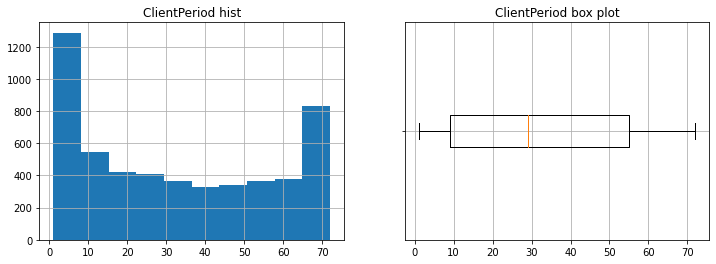

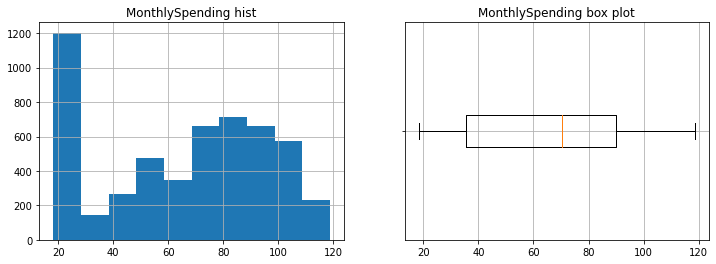

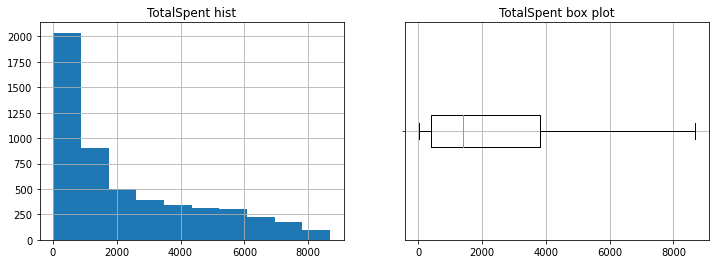

In [19]:
for col in num_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    axes[0].hist(data[col])
    axes[0].set_title(f"{col} hist")
    axes[0].grid()
    axes[1].boxplot(data[col], vert=False, labels=[''])
    axes[1].set_title(f"{col} box plot")
    axes[1].grid()
    plt.show()

#### категориальные признаки

c:\users\dsher\python_venvs\dlschool_mipt\lib\site-packages\ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  


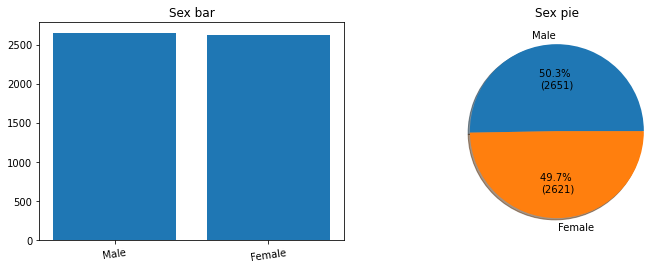

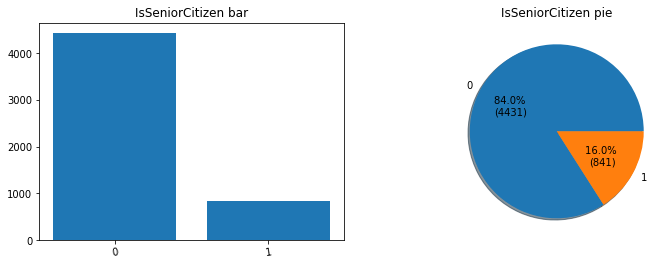

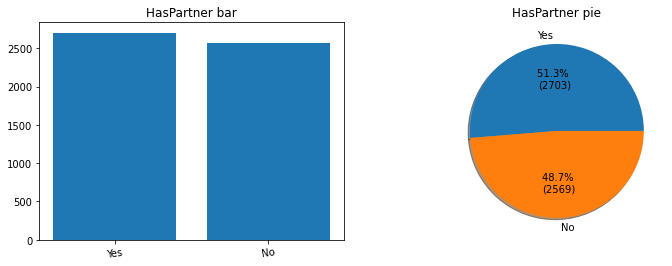

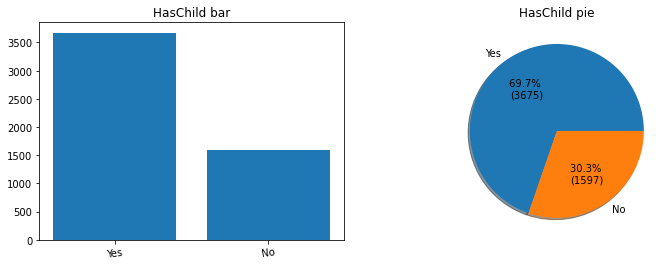

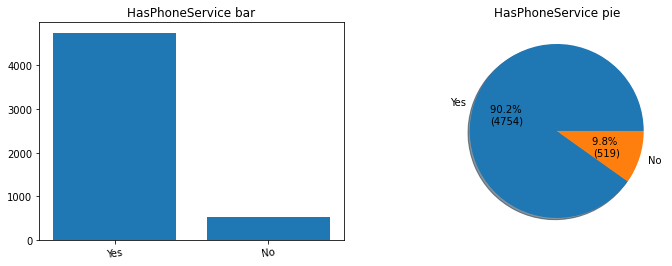

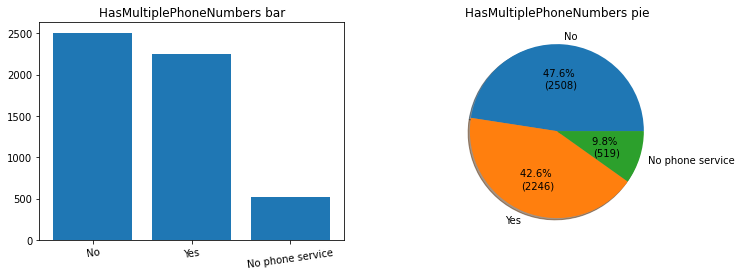

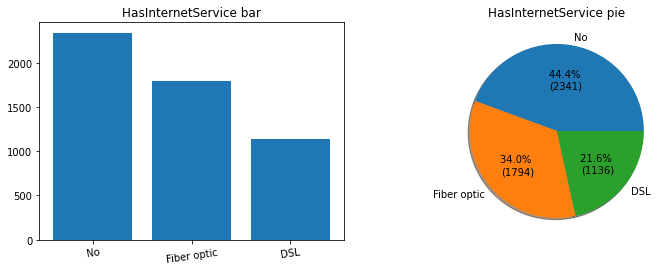

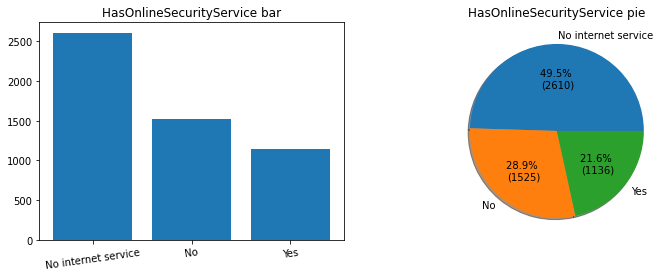

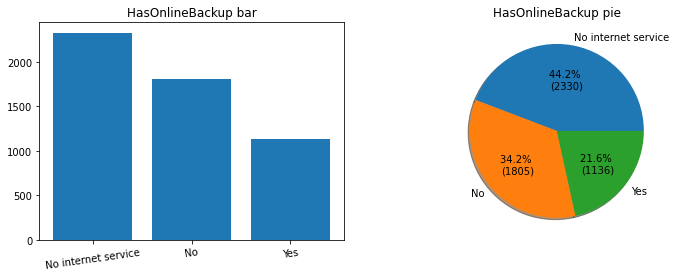

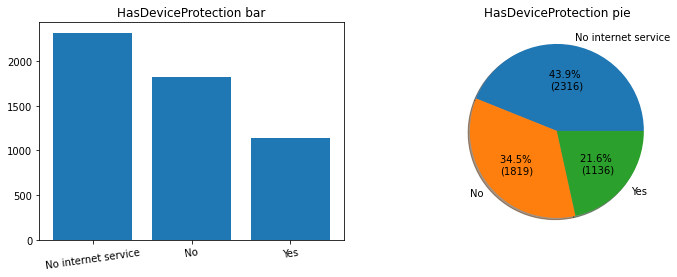

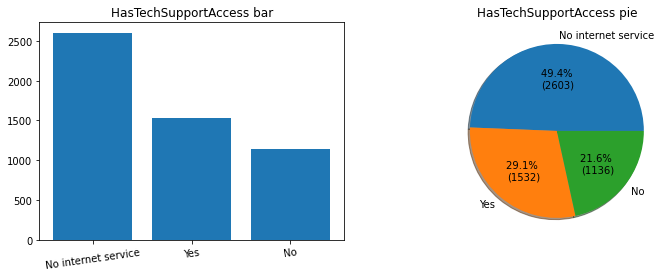

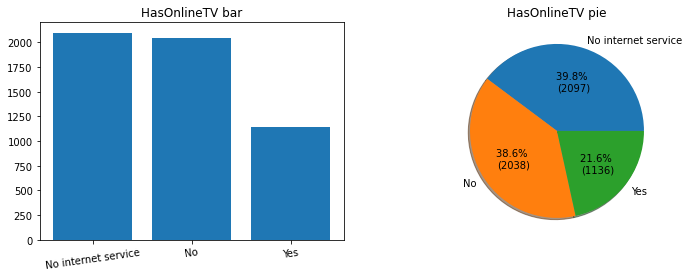

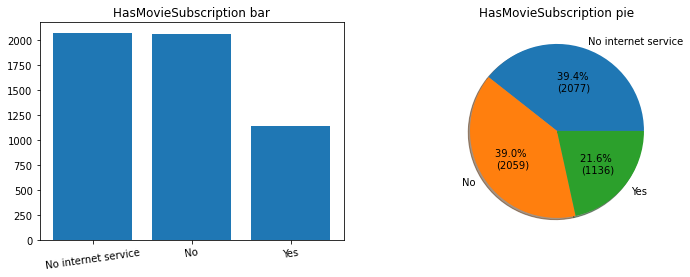

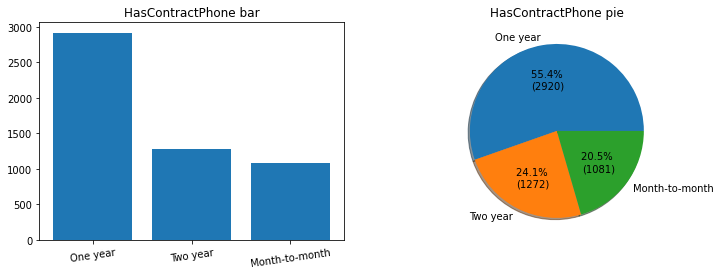

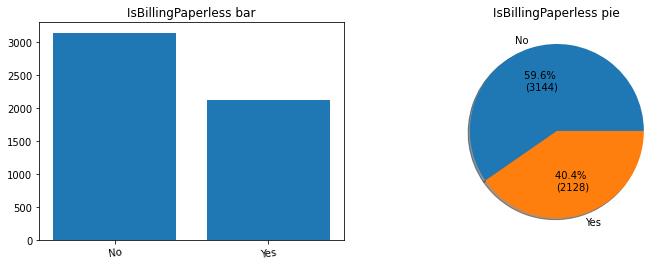

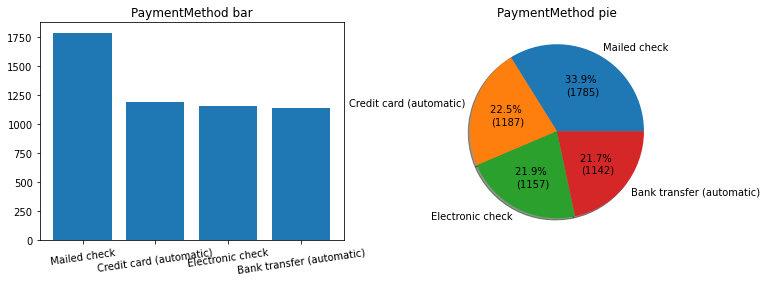

In [68]:
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% \n({:d})".format(pct, absolute)

for col in cat_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    axes[0].bar(data[col].unique().astype(str), data[col].value_counts())
    axes[0].set_xticklabels(data[col].unique().astype(str), rotation=8)
    axes[0].set_title(f"{col} bar")
    axes[1].pie(data[col].value_counts(), labels=data[col].unique(), 
                autopct=lambda pct: func(pct, data[col].value_counts()), shadow=True)
    axes[1].set_title(f"{col} pie")
    plt.show()

### Распределение целевой переменной

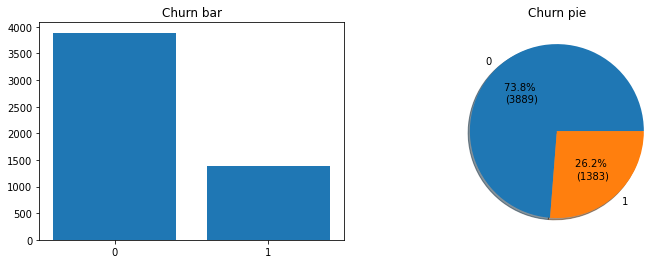

In [21]:
col = target_col

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].bar(data[col].unique().astype(str), data[col].value_counts())
axes[0].set_title(f"{col} bar")
axes[1].pie(data[col].value_counts(), labels=data[col].unique(), 
            autopct=lambda pct: func(pct, data[col].value_counts()), shadow=True)
axes[1].set_title(f"{col} pie")
plt.show()

#### Вывод:
- видим, что целевой класс **несбалансирован** - нулей существенно больше

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [22]:
# YOUR CODE

### Для разнообразия построим еще несколько графиков с помощью библиотеки **seaborn**. 

#### Численные фичи

In [55]:
import seaborn as sns

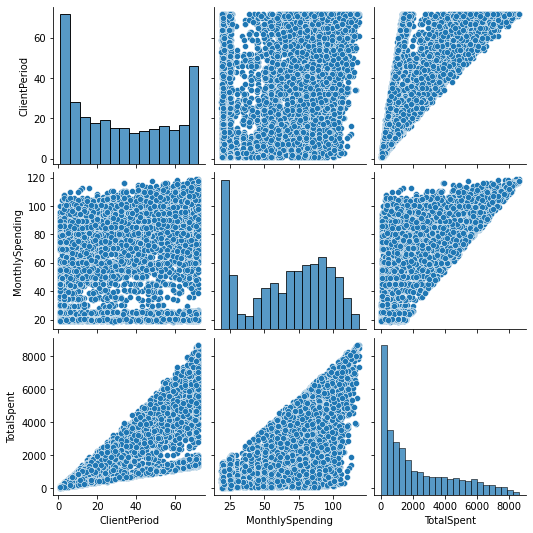

In [58]:
sns.pairplot(data[num_cols]);

Построим распределение целевой переменной **Churn** по двум категориальным признакам - **HasOnlineTV** и **PaymentMethod**

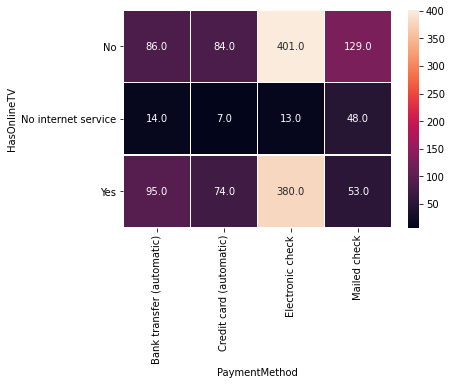

In [78]:
churn_dist = data.pivot_table(
                        index='HasOnlineTV', 
                        columns='PaymentMethod', 
                        values='Churn', 
                        aggfunc=sum).fillna(0).applymap(float)
sns.heatmap(churn_dist, annot=True, fmt=".1f", linewidths=.5);

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [23]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [24]:
# YOUR CODE

In [25]:
cat_features = data[cat_cols].values
num_features = data[num_cols].values

In [26]:
ohe = OneHotEncoder()

In [27]:
ohe_cat_features = ohe.fit_transform(cat_features).toarray()

In [28]:
X = np.concatenate([ohe_cat_features, num_features], axis=1)
y = data[target_col].values

In [29]:
X.shape, y.shape

((5273, 46), (5273,))

In [30]:
cls_pipeline = make_pipeline(
    StandardScaler(),
    LogisticRegression()
)

In [31]:
params = {
    "logisticregression__C": [200, 100, 10, 1, 0.1, 0.01, 0.001]
}

cv_search = GridSearchCV(cls_pipeline, param_grid=params, scoring="roc_auc", n_jobs=-1)

In [32]:
%%time
cv_search.fit(X, y)

Wall time: 2.6 s


GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logisticregression__C': [200, 100, 10, 1, 0.1, 0.01,
                                                   0.001]},
             scoring='roc_auc')

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

In [33]:
cv_search.best_score_

0.8448246081024792

In [34]:
cv_search.best_params_

{'logisticregression__C': 100}

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [35]:
# YOUR CODE

In [36]:
from catboost import CatBoostClassifier, cv, Pool

In [37]:
X = data[feature_cols]
y = data[target_col]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

In [38]:
cat_boost_clf = CatBoostClassifier(iterations=200, cat_features=cat_cols, eval_metric="AUC")

In [39]:
cat_boost_clf.fit(X_train, y_train, 
                  eval_set=(X_val, y_val), 
                  early_stopping_rounds=10
                 )

Learning rate set to 0.089625
0:	test: 0.8022767	best: 0.8022767 (0)	total: 194ms	remaining: 38.7s
1:	test: 0.8115429	best: 0.8115429 (1)	total: 224ms	remaining: 22.2s
2:	test: 0.8271842	best: 0.8271842 (2)	total: 251ms	remaining: 16.5s
3:	test: 0.8267701	best: 0.8271842 (2)	total: 267ms	remaining: 13.1s
4:	test: 0.8316997	best: 0.8316997 (4)	total: 286ms	remaining: 11.2s
5:	test: 0.8332150	best: 0.8332150 (5)	total: 297ms	remaining: 9.61s
6:	test: 0.8337216	best: 0.8337216 (6)	total: 318ms	remaining: 8.77s
7:	test: 0.8336397	best: 0.8337216 (6)	total: 337ms	remaining: 8.1s
8:	test: 0.8332120	best: 0.8337216 (6)	total: 353ms	remaining: 7.49s
9:	test: 0.8332742	best: 0.8337216 (6)	total: 369ms	remaining: 7.01s
10:	test: 0.8335639	best: 0.8337216 (6)	total: 388ms	remaining: 6.67s
11:	test: 0.8349988	best: 0.8349988 (11)	total: 407ms	remaining: 6.37s
12:	test: 0.8355282	best: 0.8355282 (12)	total: 428ms	remaining: 6.16s
13:	test: 0.8354569	best: 0.8355282 (12)	total: 448ms	remaining: 5.95

#### подбор наилучших параметров

In [40]:
cat_boost_clf = CatBoostClassifier(cat_features=cat_cols)

catboost_params = {
    "iterations": [90, 100, 120, 150, 200], 
    "learning_rate": [1e-1, 5e-1, 1e-2, 5e-2, 1e-3, 5e-3]
}

cv_catboost_search = GridSearchCV(cat_boost_clf, param_grid=catboost_params, scoring="roc_auc", n_jobs=-1)

In [41]:
%%time

cv_catboost_search.fit(X, y)

0:	learn: 0.6575535	total: 7.5ms	remaining: 893ms
1:	learn: 0.6269178	total: 11.3ms	remaining: 665ms
2:	learn: 0.6015093	total: 17ms	remaining: 664ms
3:	learn: 0.5782824	total: 21.6ms	remaining: 628ms
4:	learn: 0.5593573	total: 26.1ms	remaining: 601ms
5:	learn: 0.5440566	total: 31.2ms	remaining: 592ms
6:	learn: 0.5299792	total: 39ms	remaining: 630ms
7:	learn: 0.5179998	total: 43.5ms	remaining: 610ms
8:	learn: 0.5076995	total: 48.4ms	remaining: 597ms
9:	learn: 0.4986495	total: 53.1ms	remaining: 584ms
10:	learn: 0.4911398	total: 61.7ms	remaining: 611ms
11:	learn: 0.4828845	total: 67.7ms	remaining: 609ms
12:	learn: 0.4762782	total: 72.3ms	remaining: 595ms
13:	learn: 0.4689525	total: 77.5ms	remaining: 587ms
14:	learn: 0.4632646	total: 82ms	remaining: 574ms
15:	learn: 0.4579798	total: 86.1ms	remaining: 560ms
16:	learn: 0.4542088	total: 88.7ms	remaining: 537ms
17:	learn: 0.4504080	total: 91.4ms	remaining: 518ms
18:	learn: 0.4462939	total: 95.9ms	remaining: 510ms
19:	learn: 0.4419545	total: 1

GridSearchCV(estimator=<catboost.core.CatBoostClassifier object at 0x000001ACDD004408>,
             n_jobs=-1,
             param_grid={'iterations': [90, 100, 120, 150, 200],
                         'learning_rate': [0.1, 0.5, 0.01, 0.05, 0.001, 0.005]},
             scoring='roc_auc')

#### Выпишите какое лучшее качество и с какими параметрами вам удалось получить

In [42]:
cv_catboost_search.best_score_

0.8474558096114077

In [43]:
cv_catboost_search.best_params_

{'iterations': 120, 'learning_rate': 0.1}

#### обучим с наилучшими параметрами на всех данных и сформируем посылку на kaggle

In [50]:
cat_boost_clf_best = CatBoostClassifier(cat_features=cat_cols, **cv_catboost_search.best_params_)

In [51]:
cat_boost_clf_best.fit(X, y)

0:	learn: 0.6575535	total: 7.94ms	remaining: 945ms
1:	learn: 0.6269178	total: 12.1ms	remaining: 715ms
2:	learn: 0.6015093	total: 16.3ms	remaining: 637ms
3:	learn: 0.5782824	total: 21.6ms	remaining: 627ms
4:	learn: 0.5593573	total: 28.5ms	remaining: 657ms
5:	learn: 0.5440566	total: 34.1ms	remaining: 648ms
6:	learn: 0.5299792	total: 42.7ms	remaining: 689ms
7:	learn: 0.5179998	total: 51.2ms	remaining: 717ms
8:	learn: 0.5076995	total: 55.4ms	remaining: 684ms
9:	learn: 0.4986495	total: 60ms	remaining: 660ms
10:	learn: 0.4911398	total: 66.9ms	remaining: 663ms
11:	learn: 0.4828845	total: 71.3ms	remaining: 642ms
12:	learn: 0.4762782	total: 75.7ms	remaining: 623ms
13:	learn: 0.4689525	total: 79.5ms	remaining: 602ms
14:	learn: 0.4632646	total: 83.6ms	remaining: 585ms
15:	learn: 0.4579798	total: 87.2ms	remaining: 567ms
16:	learn: 0.4542088	total: 89.6ms	remaining: 543ms
17:	learn: 0.4504080	total: 91.6ms	remaining: 519ms
18:	learn: 0.4462939	total: 95.3ms	remaining: 507ms
19:	learn: 0.4419545	tot

# Предсказания

In [52]:
best_model = cat_boost_clf_best  # какая-то предыдущая модель

In [45]:
X_test = pd.read_csv('./test.csv')

In [53]:
best_model.predict_proba(X_test)

array([[0.95872261, 0.04127739],
       [0.32969142, 0.67030858],
       [0.29411932, 0.70588068],
       ...,
       [0.1494209 , 0.8505791 ],
       [0.42427539, 0.57572461],
       [0.98015285, 0.01984715]])

In [54]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] = best_model.predict_proba(X_test)[:, 1]
submission.to_csv('./my_submission.csv', index=False)

### Моё имя: **Dmitry Shereshevskiy**
### Текущий лучший результат на kaggle: **0.85193** (возможно, еще буду улучшать)

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.